In [ ]:
import numpy as np

#1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.

### Векторизированный вариант

In [ ]:
def ts1(X):
  a = X.diagonal()
  res = a[a != 0].prod()
  return res

Проверка на исходном наборе данных

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
ts1(X)

3

In [ ]:
%%timeit
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
ts1(X)

The slowest run took 7.68 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 9.89 µs per loop


Матрица $100 \times 100$

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(100, 100))
ts1(X)

The slowest run took 4.75 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 181 µs per loop


Матрица $1.000 \times 1.000$

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(1_000, 1_000))
ts1(X)

100 loops, best of 5: 16.2 ms per loop


### Вариант с циклом

In [ ]:
def prod_diag(mat):

  res = 1

  for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
      if i == j and mat[i, j] != 0:
        res *= mat[i, j]
  return res

Проверка на исходном наборе данных

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
prod_diag(X)

3

In [ ]:
%%timeit
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
prod_diag(X)

The slowest run took 4.96 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 9.54 µs per loop


Матрица $100 \times 100$

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(100, 100))
prod_diag(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in long_scalars
  


The slowest run took 10.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 743 µs per loop


Матрица $1.000 \times 1.000$

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(1_000, 1_000))
prod_diag(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in long_scalars
  


10 loops, best of 5: 67.6 ms per loop


### Смешанный вариант

In [ ]:
def shuffle_var(mat):
  res = 1
  diag = mat.diagonal()
  for d in diag:
    if d != 0:
      res *= d
  return res

Проверка на исходном наборе данных

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
shuffle_var(X)

3

In [ ]:
%%timeit
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
shuffle_var(X)

The slowest run took 5.12 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7.88 µs per loop


Матрица $100 \times 100$

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(100, 100))
shuffle_var(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


The slowest run took 4.33 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 272 µs per loop


Матрица $1.000 \times 1.000$

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(1000, 1000))
shuffle_var(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


100 loops, best of 5: 17 ms per loop


# 2. Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

### Векторизированный вариант

In [ ]:
N = 10
X = np.random.randint(-10, 10, size=(5, 5))
i = np.random.randint(0, np.array(X.shape).max(), size=N)
j = np.random.randint(0, np.array(X.shape).max(), size=N)

Проверка алгоритма

In [ ]:
X, i, j

(array([[ 1, -5,  6, -4, -6],
        [-4, -3,  2, -5,  6],
        [ 3,  8,  6,  3, -8],
        [-3,  9, -3,  5,  0],
        [-3, -5, -4,  8,  6]]),
 array([3, 2, 0, 2, 0, 0, 2, 2, 2, 1]),
 array([1, 2, 2, 0, 0, 0, 0, 0, 4, 0]))

In [ ]:
X[i, j][:, np.newaxis]

array([[ 9],
       [ 6],
       [ 6],
       [ 3],
       [ 1],
       [ 1],
       [ 3],
       [ 3],
       [-8],
       [-4]])

In [ ]:
%%timeit
X[i, j][:, np.newaxis]

The slowest run took 21.61 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.49 µs per loop


1000 элементов

In [ ]:
N = 1_000
X = np.random.randint(-10, 10, size=(5, 5))
i = np.random.randint(0, np.array(X.shape).max(), size=N)
j = np.random.randint(0, np.array(X.shape).max(), size=N)

In [ ]:
%%timeit
X[i, j][:, np.newaxis]

The slowest run took 49.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7.94 µs per loop


In [ ]:
N = 10_000
X = np.random.randint(-10, 10, size=(5, 5))
i = np.random.randint(0, np.array(X.shape).max(), size=N)
j = np.random.randint(0, np.array(X.shape).max(), size=N)

In [ ]:
%%timeit
X[i, j][:, np.newaxis]

10000 loops, best of 5: 63.5 µs per loop


### Вариант с циклом

In [ ]:
N = 10
X = np.random.randint(-10, 10, size=(5, 5))
i = np.random.randint(0, np.array(X.shape).max(), size=N)
j = np.random.randint(0, np.array(X.shape).max(), size=N)

Провека алгоритма

In [ ]:
X, i, j

(array([[ -8,   2,   8,  -5,   5],
        [  7,  -5,   8,   6,   5],
        [-10,   7,  -1,  -2,  -4],
        [-10,  -7,  -7,  -1,   7],
        [ -5,   3,   0,  -1,  -1]]),
 array([0, 4, 4, 2, 1, 1, 1, 2, 2, 4]),
 array([2, 1, 1, 3, 1, 1, 0, 1, 4, 0]))

In [ ]:
[[X[i[k], j[k]]] for k in range(len(j))]

[[8], [3], [3], [-2], [-5], [-5], [7], [7], [-4], [-5]]

In [ ]:
%%timeit
[[X[i[k], j[k]]] for k in range(len(j))]

The slowest run took 5.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 6.74 µs per loop


1000 элементов

In [ ]:
N = 1_000
X = np.random.randint(-10, 10, size=(5, 5))
i = np.random.randint(0, np.array(X.shape).max(), size=N)
j = np.random.randint(0, np.array(X.shape).max(), size=N)

In [ ]:
%%timeit
[[X[i[k], j[k]]] for k in range(len(j))]

1000 loops, best of 5: 626 µs per loop


10000 элементов

In [ ]:
N = 10_000
X = np.random.randint(-10, 10, size=(5, 5))
i = np.random.randint(0, np.array(X.shape).max(), size=N)
j = np.random.randint(0, np.array(X.shape).max(), size=N)

In [ ]:
%%timeit
[[X[i[k], j[k]]] for k in range(len(j))]

100 loops, best of 5: 6.42 ms per loop


### Смешанный вариант

In [ ]:
N = 10
X = np.random.randint(-10, 10, size=(5, 5))
i = np.random.randint(0, np.array(X.shape).max(), size=N)
j = np.random.randint(0, np.array(X.shape).max(), size=N)

Проверка рабоы алгоритма

In [ ]:
np.array([X[i[k], j[k], np.newaxis] for k in range(len(j))])

array([[  6],
       [  2],
       [ -2],
       [-10],
       [  1],
       [ -1],
       [ -5],
       [ -8],
       [ -2],
       [ -1]])

In [ ]:
%%timeit
np.array([X[i[k], j[k], np.newaxis] for k in range(len(j))])

100000 loops, best of 5: 13.2 µs per loop


1.000 элементов

In [ ]:
N = 1_000
X = np.random.randint(-10, 10, size=(5, 5))
i = np.random.randint(0, np.array(X.shape).max(), size=N)
j = np.random.randint(0, np.array(X.shape).max(), size=N)

In [ ]:
%%timeit
np.array([X[i[k], j[k], np.newaxis] for k in range(len(j))])

1000 loops, best of 5: 1.1 ms per loop


10.000 элементов

In [ ]:
N = 10_000
X = np.random.randint(-10, 10, size=(5, 5))
i = np.random.randint(0, np.array(X.shape).max(), size=N)
j = np.random.randint(0, np.array(X.shape).max(), size=N)

In [ ]:
%%timeit
np.array([X[i[k], j[k], np.newaxis] for k in range(len(j))])

100 loops, best of 5: 11.2 ms per loop


# 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.

### Векторизированный вариант

In [ ]:
def mset_vec(x, y):
  x.sort(), y.sort()
  res = (x == y).all()
  return res

Проверка работы алгоритма на исходных данных

In [ ]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
mset_vec(x, y)

True

In [ ]:
%%timeit
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
mset_vec(x, y)

The slowest run took 24.48 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 6.88 µs per loop


1.000 элементов

In [ ]:
%%timeit
x = np.arange(1_000)
y = np.arange(1_000)
mset_vec(x, y)

The slowest run took 4.99 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 17.5 µs per loop


In [ ]:
%%timeit
x = np.arange(10_000)
y = np.arange(10_000)
mset_vec(x, y)

10000 loops, best of 5: 179 µs per loop


10.000 элементов

### Вариант с циклом

In [ ]:
def mset(x, y):
  x.sort(), y.sort()
  for i, j in zip(x, y):
    if i != j:
      return False
  return True

Проверка работы алгоритма на исходных данных

In [ ]:
x = [1, 2, 2, 4]
y = [4, 2, 1, 2]
mset(x, y)

True

In [ ]:
%%timeit
x = [1, 2, 2, 4]
y = [4, 2, 1, 2]
mset(x, y)

The slowest run took 7.20 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.02 µs per loop


1.000 элементов

In [ ]:
%%timeit
x = list(range(1_000))
y = list(range(1_000))
mset(x, y)

10000 loops, best of 5: 97.5 µs per loop


10.000 элементов

In [ ]:
%%timeit
x = np.arange(10_000)
y = np.arange(10_000)
mset(x, y)

100 loops, best of 5: 2.65 ms per loop


### Смешанный вариант

In [ ]:
def mset_sh(x, y):
  x.sort(), y.sort()
  for i in range(0, len(x), 2):
    if not (x[i:i + 2] == y[i:i + 2]).all():
      return False
  return True

Проверка работы алгоритма на исходных данных

In [ ]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
mset_sh(x, y)

True

In [ ]:
%%timeit
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
mset_sh(x, y)

The slowest run took 6.93 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 12.1 µs per loop


1.000 элементов

In [ ]:
%%timeit
x = np.arange(1_000)
y = np.arange(1_000)
mset_sh(x, y)

1000 loops, best of 5: 1.46 ms per loop


10.000 элментов

In [ ]:
%%timeit
x = np.arange(10_000)
y = np.arange(10_000)
mset_sh(x, y)

100 loops, best of 5: 14.6 ms per loop


# 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

### Векторизированный вариант

In [ ]:
def min_zero_vec(X):
  # смотрим нулевые эл-ты
  null = X == 0
  # первый, т к перед ним не может быть 0
  X = X[1:]
  X = X[null[:-1]]
  X = X.max()
  return X

Проверка работы алгоритма на исходных данных

In [ ]:
X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
min_zero_vec(X)

5

In [ ]:
%%timeit
X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
min_zero_vec(X)

The slowest run took 11.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7.63 µs per loop


1000 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(1_000))
min_zero_vec(X)

The slowest run took 13.80 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 36.1 µs per loop


10.000 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(10_000))
min_zero_vec(X)

1000 loops, best of 5: 205 µs per loop


### Вариант с циклом

In [ ]:
def max_zero_loop(X):
  new = []
  for i in range(1, len(X)):
    if X[i - 1] == 0:
      new.append(X[i])
  res = max(new)
  return res

Проверка работы алгоритма на исходных данных

In [ ]:
X = [6, 2, 0, 3, 0, 0, 5, 7, 0]
max_zero_loop(X)

5

In [ ]:
%%timeit
X = [6, 2, 0, 3, 0, 0, 5, 7, 0]
max_zero_loop(X)

The slowest run took 4.70 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.71 µs per loop


1.000 элементов

In [ ]:
%%timeit
X = list(np.random.randint(-10, 10, size=(1_000)))
max_zero_loop(X)

1000 loops, best of 5: 378 µs per loop


10.000 элементов

In [ ]:
%%timeit
X = list(np.random.randint(-10, 10, size=(10_000)))
max_zero_loop(X)

100 loops, best of 5: 3.84 ms per loop


### Смешанный вариант

In [ ]:
def max_zero_sh(X):
  new = np.array([X[i] for i in range(1, X.shape[0]) if X[i - 1] == 0])
  res = new.max()
  return res

Проверка алгоритма на исходнных данных

In [ ]:
X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_zero_sh(X)

5

In [ ]:
%%timeit
X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_zero_sh(X)

The slowest run took 19.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 14.6 µs per loop


1.000 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(1_000))
max_zero_sh(X)

1000 loops, best of 5: 420 µs per loop


10.000 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(10_000))
max_zero_sh(X)

100 loops, best of 5: 4.12 ms per loop


#  5. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread. Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).¶

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Векторизированый вариант

In [ ]:
coef = np.array([0.299, 0.587, 0.114])

Проверка корректности работы алгоритма

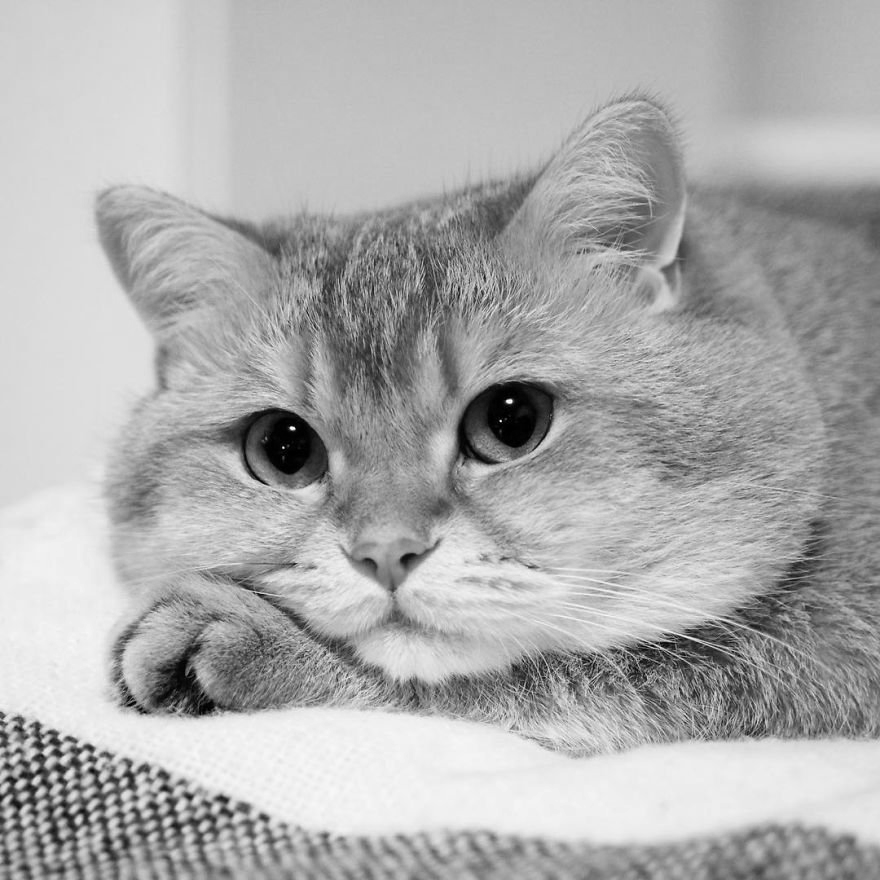

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/1.jpg")
res = np.sum((img * coef), axis=2)
Image.fromarray(res.astype(np.uint8))

Размер изображения $880 \times 880$

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/1.jpg")

In [ ]:
%%timeit
res = np.sum((img * coef), axis=2)

10 loops, best of 5: 27.4 ms per loop


Размер изображения $800 \times 1200$

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/2.jpg")

In [ ]:
%%timeit
res = np.sum((img * coef), axis=2)

10 loops, best of 5: 34.4 ms per loop


Размер изображения $1285 \times 1920$

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/3.jpg")

In [ ]:
res = np.sum((img * coef), axis=2)

### Вариант с циклом

In [ ]:
numChannels = 3

In [ ]:
def gray_loop(img, coef, numChannels):
  res = 0
  for i in range(numChannels):
    res += coef[i] * img[:, :, i]
  return res

In [ ]:
coef = np.array([0.299, 0.587, 0.114])

Проверка корректности работы алгоритма

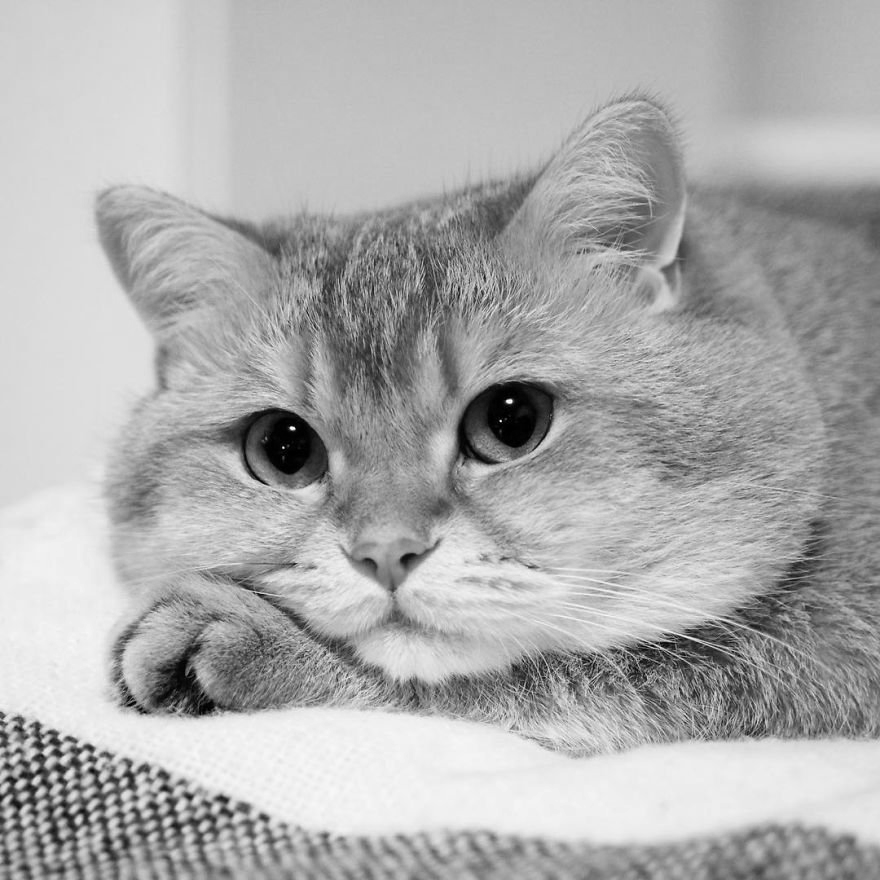

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/1.jpg")
res = gray_loop(img, coef, numChannels)
Image.fromarray(res.astype(np.uint8))

Размер изображения $880 \times 880$

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/1.jpg")

In [ ]:
%%timeit
gray_loop(img, coef, numChannels)

100 loops, best of 5: 5.63 ms per loop


Размер изображения $800 \times 1200$


In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/2.jpg")

In [ ]:
%%timeit
gray_loop(img, coef, numChannels)

100 loops, best of 5: 7.68 ms per loop


Размер изображения $1285 \times 1920$

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/3.jpg")

In [ ]:
%%timeit
gray_loop(img, coef, numChannels)

10 loops, best of 5: 24.7 ms per loop


### Смешанный вариант

In [ ]:
def gray_sh(img, coef, numChannels):
  img = img * coef.reshape(1, 1, img.shape[2])
  res = 0
  for i in range(numChannels):
    res += img[:, :, i]
  return res

Проверка корректности рабоыт алгоритма

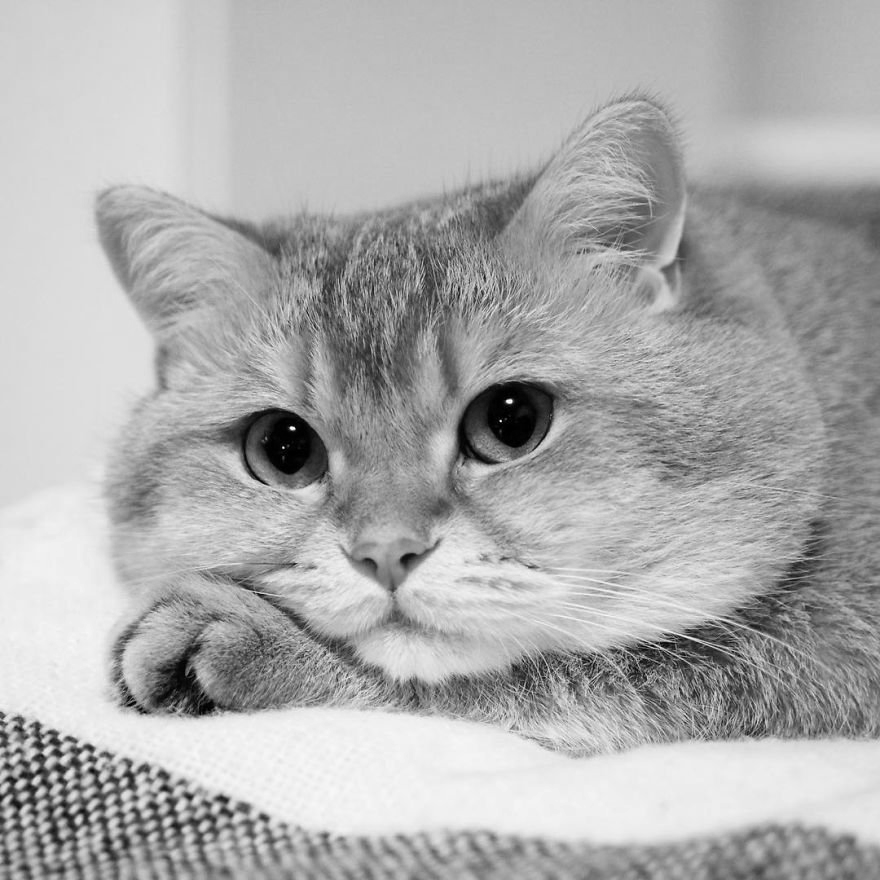

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/1.jpg")
res = gray_sh(img, coef, numChannels)
Image.fromarray(res.astype(np.uint8))

Размер изображения $880 \times 880$

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/1.jpg")

In [ ]:
%%timeit
gray_sh(img, coef, numChannels)

10 loops, best of 5: 17.6 ms per loop


Размер изображения $800 \times 1200$

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/2.jpg")

In [ ]:
%%timeit
gray_sh(img, coef, numChannels)

10 loops, best of 5: 22.3 ms per loop


Размер изображения $1285 \times 1920$

In [ ]:
img = plt.imread("/content/gdrive/MyDrive/HW1ML/3.jpg")

In [ ]:
%%timeit
gray_sh(img, coef, numChannels)

10 loops, best of 5: 57.1 ms per loop


# 6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.

### Реализация numpy

In [ ]:
def RLE(X):
  # ищем ключи неравных элементов
  keys = np.where(X[1:] != X[:-1])
  # добавляем +1 элемент (послений)
  keys = np.append(keys, X.shape[0] - 1)
  # считаем их кол-во, вычитая ключи
  count = np.diff(np.append(-1, keys))
  return X[keys], count

Проверка на исходном наборе

In [ ]:
X = np.array([ 2, 2, 2, 3, 3, 3, 5, 2])
res = RLE(X)
res

(array([2, 3, 5, 2]), array([3, 3, 1, 1]))

In [ ]:
%%timeit
X = np.array([5, 2, 2, 2, 3, 3, 3, 5])
res = RLE(X)

The slowest run took 5.05 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 27.2 µs per loop


1.000 элементов

In [ ]:
%%timeit
X = np.random.randint(-2, 2, size=1_000)
RLE(X)

The slowest run took 5.74 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 52.7 µs per loop


10.000 элементов

In [ ]:
%%timeit
X = np.random.randint(-2, 2, size=10_000)
RLE(X)

10000 loops, best of 5: 154 µs per loop


### Реализация с циклом

In [ ]:
def RLE_loop(X):

  count = []
  elem = []
  curr = None
  for i in range(len(X)):

    if curr == None:
      res = 1
      curr = X[i]
      continue
    if curr == X[i]:
      res += 1
    if curr != X[i] or i + 1 == len(X):
      elem.append(curr)
      count.append(res)
      curr = X[i]
      res = 1
    if i + 1 == len(X) and curr == X[i]:
      count.append(1)
      elem.append(curr)
  return elem, count

Проверка на исходном наборе данных

In [ ]:
X = np.array([ 2, 2, 2, 3, 3, 3, 5])
res = RLE_loop(X)
res

([2, 3, 5], [3, 3, 1])

In [ ]:
%%timeit
X = np.array([2, 2, 2, 3, 3, 3, 5])
RLE_loop(X)

The slowest run took 5.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 8.16 µs per loop


1.000 элементов

In [ ]:
%%timeit
X = np.random.randint(-2, 2, size=1_000)
RLE_loop(X)

1000 loops, best of 5: 1.02 ms per loop


10.000 элементов

In [ ]:
%%timeit
X = np.random.randint(-2, 2, size=10_000)
RLE_loop(X)

100 loops, best of 5: 9.96 ms per loop


### Смешанный вариант

In [ ]:
def RLE_sh(X):
  # ищем ключи неравных элементов
  keys = np.where(X[1:] != X[:-1])
  # добавляем +1 элемент (послений)
  keys = np.append(keys, X.shape[0] - 1)

  count = []
  curr = None
  for i in range(len(X)):

    if curr == None:
      res = 1
      curr = X[i]
      continue
    if curr == X[i]:
      res += 1
    if curr != X[i] or i + 1 == len(X):
      count.append(res)
      curr = X[i]
      res = 1
    if i + 1 == len(X) and curr == X[i]:
      count.append(1)
  return X[keys], count

Проверка на исходном наборе данных

In [ ]:
X = np.array([ 2, 2, 2, 3, 3, 3, 5])
res = RLE_loop(X)
res

([2, 3, 5], [3, 3, 1])

In [ ]:
%%timeit
X = np.array([5, 2, 2, 2, 3, 3, 3, 5])
RLE_sh(X)

The slowest run took 5.60 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 21.6 µs per loop


In [ ]:
%%timeit
X = np.random.randint(-2, 2, size=1_000)
RLE_sh(X)

1000 loops, best of 5: 928 µs per loop


In [ ]:
%%timeit
X = np.random.randint(-2, 2, size=10_000)
RLE_sh(X)

100 loops, best of 5: 9.27 ms per loop


# 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

Функция из библиотеки scipy

In [ ]:
from scipy.spatial import distance

In [ ]:
X = np.array([[0, 0], [1, 1]])
Y = np.array([[3, 4], [0, 0], [8, 6]])
print(distance.cdist(X, Y))

[[ 5.          0.         10.        ]
 [ 3.60555128  1.41421356  8.60232527]]


### Векторизированный вариант

In [ ]:
def Euc_mat_vec(X, Y):
  X_norm = np.sum(X*X, axis=1)
  # делаем вектор столбец
  X_norm = X_norm[:, np.newaxis]
  Y_norm = np.sum(Y*Y, axis=1)
  xy = np.dot(X, Y.T)
  res = (X_norm + Y_norm - 2*xy)**(0.5)
  return res

Проверка корректности работы алгоритма

In [ ]:
X = np.array([[0, 0], [1, 1]])
Y = np.array([[3, 4], [0, 0], [8, 6]])

Euc_mat_vec(X, Y)

array([[ 5.        ,  0.        , 10.        ],
       [ 3.60555128,  1.41421356,  8.60232527]])

In [ ]:
%%timeit
X = np.array([[0, 0], [0, 0]])
Y = np.array([[3, 4], [0, 0], [8, 6]])

Euc_mat_vec(X, Y)

10000 loops, best of 5: 32.5 µs per loop


100 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(100, 2))
Y = np.random.randint(-10, 10, size=(100, 2))

Euc_mat_vec(X, Y)

1000 loops, best of 5: 998 µs per loop


1000 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(1000, 2))
Y = np.random.randint(-10, 10, size=(1000, 2))

Euc_mat_vec(X, Y)

10 loops, best of 5: 86.2 ms per loop


### Вариант с циклом

In [ ]:
def Euc_mat_loop(X, Y):
  mat = []
  for x in X:
    row = []
    for y in Y:
      tmp_x, tmp_y = 0, 0
      for coord_x, coord_y in zip(x, y):
        tmp_x += coord_x**2
        tmp_y += coord_y**2
      row.append((tmp_x + tmp_y)**(0.5))
    mat.append(row)
  return mat

def print_mat(mat):
  for row in mat:
    print(f'{row}\n')

Проверка корректности алгоритма

In [ ]:
X = np.array([[0, 0], [1, 1]])
Y = np.array([[3, 4], [0, 0], [8, 6]])

print_mat(Euc_mat_loop(X, Y))

[5.0, 0.0, 10.0]

[5.196152422706632, 1.4142135623730951, 10.099504938362077]



In [ ]:
%%timeit
X = np.array([[0, 0], [0, 0]])
Y = np.array([[3, 4], [0, 0], [8, 6]])

Euc_mat_loop(X, Y)

10000 loops, best of 5: 50.7 µs per loop


100 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(100, 2))
Y = np.random.randint(-10, 10, size=(100, 2))

Euc_mat_loop(X, Y)

10 loops, best of 5: 67.6 ms per loop


1000 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(1000, 2))
Y = np.random.randint(-10, 10, size=(1000, 2))

Euc_mat_loop(X, Y)

1 loop, best of 5: 6.98 s per loop


### Смешанный вариант

In [ ]:
def Euc_mat_sh(X, Y):
  nX, nY = [], []
  for x in X:
    tmp = 0
    for i in x:
      tmp += i*i
    nX.append(tmp)
  for y in Y:
    tmp = 0
    for i in y:
      tmp += i*i
    nY.append(tmp)
  nX = np.array(nX)[:, np.newaxis]
  nY = np.array(nY)
  xy = np.dot(X, Y.T)
  res = (nX + nY - 2*xy)**(0.5)
  return res

Проверка корректности работы алгоритма

In [ ]:
X = np.array([[0, 0], [1, 1]])
Y = np.array([[3, 4], [0, 0], [8, 6]])

Euc_mat_sh(X, Y)

array([[ 5.        ,  0.        , 10.        ],
       [ 3.60555128,  1.41421356,  8.60232527]])

In [ ]:
%%timeit
X = np.array([[0, 0], [0, 0]])
Y = np.array([[3, 4], [0, 0], [8, 6]])

Euc_mat_sh(X, Y)

The slowest run took 4.50 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 31.7 µs per loop


100 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(100, 2))
Y = np.random.randint(-10, 10, size=(100, 2))

Euc_mat_sh(X, Y)

1000 loops, best of 5: 1.36 ms per loop


1000 элементов

In [ ]:
%%timeit
X = np.random.randint(-10, 10, size=(1000, 2))
Y = np.random.randint(-10, 10, size=(1000, 2))

Euc_mat_sh(X, Y)

10 loops, best of 5: 89 ms per loop


# Выводы

## При использовании векторных вычислений скорость выполнения операций при малых объемах данных может бытьь больше, чем вариант с циклом, однако при увеличении количества данных, скорость векторизированного вариант проблададет на вариантом с циклом. Смешение этих методов не является хорошим выбором, так как скорость вычислений будет меньше, чем в каждом методе по отдельности. 